<a href="https://colab.research.google.com/github/packtpublishing/Machine-Learning-for-Imbalanced-Data/blob/main/chapter07/plot_transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: https://pytorch.org/vision/main/auto_examples/plot_transforms.html#sphx-glr-download-auto-examples-plot-transforms-py


# Illustration of transforms

This example illustrates the various transforms available in `the
torchvision.transforms module <transforms>`.


In [99]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T

orig_img = Image.open("images/mnist-three.png")
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, col_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title="Original image")
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    if col_title is not None:
        for col_idx in range(num_cols - 1):
            axs[0, col_idx + 1].set(title=col_title[col_idx])
            axs[0, col_idx + 1].title.set_size(8)

    plt.tight_layout()

## Pad
The class `torchvision.transforms.Pad` transform fills image borders with some pixel values.



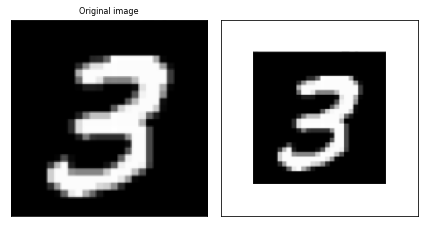

In [131]:
padded_imgs = [T.Pad(padding=30)(orig_img)]
plot(padded_imgs)

## Resize
The class `torchvision.transforms.Resize` transform resizes an image.


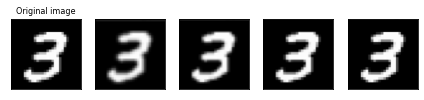

In [142]:
resized_imgs = [T.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(resized_imgs)

## CenterCrop

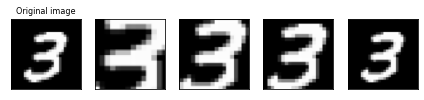

In [144]:
center_crops = [
    T.CenterCrop(size=size)(orig_img) for size in (60, 80, 90, orig_img.size)
]
plot(center_crops)

## FiveCrop
The class `torchvision.transforms.FiveCrop` transform crops the given image into four corners and the central crop.



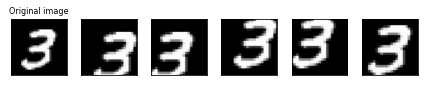

In [133]:
(top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size=(100, 100))(
    orig_img
)
plot([top_left, top_right, bottom_left, bottom_right, center])

## Random transforms
The following transforms are random, which means that the same transfomer instance will produce different result each time it transforms a given image.

### ColorJitter
The class `torchvision.transforms.ColorJitter` transform
randomly changes the brightness, saturation, and other properties of an image.



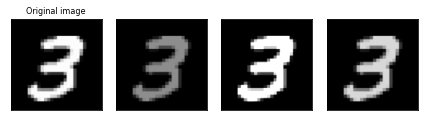

In [149]:
jitter = T.ColorJitter(brightness=0.7, hue=0.5)
jitted_imgs = [jitter(orig_img) for _ in range(3)]
plot(jitted_imgs)

### GaussianBlur
The class `torchvision.transforms.GaussianBlur` transform performs gaussian blur transform on an image.



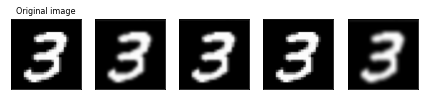

In [153]:
gaussian_blurrer = T.GaussianBlur(kernel_size=(9, 11), sigma=(0.1, 5))
blurred_imgs = [gaussian_blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

### RandomPerspective
The class `torchvision.transforms.RandomPerspective` transform performs random perspective transform on an image.



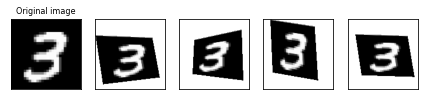

In [40]:
perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

### RandomRotation
The class `torchvision.transforms.RandomRotation` transform
(see also :func:`~torchvision.transforms.functional.rotate`)
rotates an image with random angle.



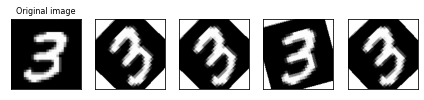

In [157]:
rotater = T.RandomRotation(degrees=(0, 50))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

### RandomAffine
The class `torchvision.transforms.RandomAffine` transform
(see also :func:`~torchvision.transforms.functional.affine`)
performs random affine transform on an image.



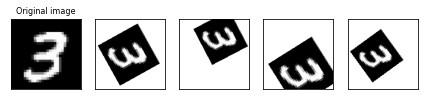

In [42]:
affine_transfomer = T.RandomAffine(
    degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75)
)
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot(affine_imgs)

### RandomCrop
The class `torchvision.transforms.RandomCrop` transform
(see also :func:`~torchvision.transforms.functional.crop`)
crops an image at a random location.



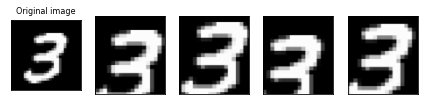

In [136]:
cropper = T.RandomCrop(size=(90, 80))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

### RandomResizedCrop
The class `torchvision.transforms.RandomResizedCrop` transform
(see also :func:`~torchvision.transforms.functional.resized_crop`)
crops an image at a random location, and then resizes the crop to a given
size.



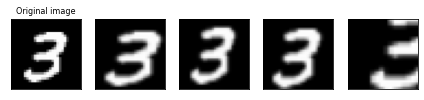

In [44]:
resize_cropper = T.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops)

### RandomAdjustSharpness
The class `torchvision.transforms.RandomAdjustSharpness` transform
(see also :func:`~torchvision.transforms.functional.adjust_sharpness`)
randomly adjusts the sharpness of the given image.



Torchvision supports lots of other image augmentation methods like 

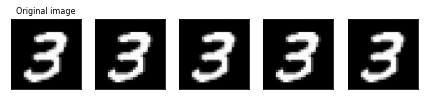

In [56]:
sharpness_adjuster = T.RandomAdjustSharpness(sharpness_factor=2)
sharpened_imgs = [sharpness_adjuster(orig_img) for _ in range(4)]
plot(sharpened_imgs)

### RandAugment
The class `torchvision.transforms.RandAugment` transform automatically augments the data.



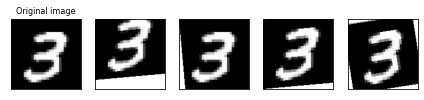

In [51]:
augmenter = T.RandAugment()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

## Randomly-applied transforms

Some transforms are randomly-applied given a probability ``p``.  That is, the
transformed image may actually be the same as the original one, even when
called with the same transformer instance!

### RandomHorizontalFlip
The class `torchvision.transforms.RandomHorizontalFlip` transform
(see also :func:`~torchvision.transforms.functional.hflip`)
performs horizontal flip of an image, with a given probability.



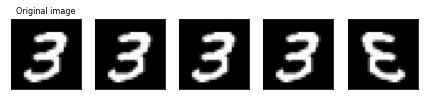

In [48]:
hflipper = T.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

### RandomVerticalFlip
The class `torchvision.transforms.RandomVerticalFlip` transform
(see also :func:`~torchvision.transforms.functional.vflip`)
performs vertical flip of an image, with a given probability.



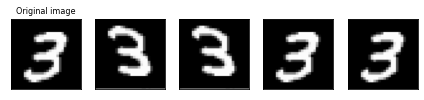

In [47]:
vflipper = T.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

TorchVision supports lots of other image augmentation methods like GrayScale, RandomPosterize, RandomSolarize, RandomAutocontrast, RandomEqualize, RandomInvert, AugMix, TrivialAugmentWide, AutoAugment

Gaussian Noise

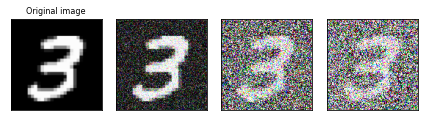

In [119]:
def add_noise(inputs, noise_factor=0.3):
    noisy = inputs + torch.randn_like(inputs) * noise_factor
    noisy = torch.clip(noisy, 0.0, 1.0)
    return noisy


noise_imgs = [
    add_noise(T.ToTensor()(orig_img), noise_factor) for noise_factor in (0.2, 0.7, 0.9)
]
noise_imgs = [T.ToPILImage()(noise_img) for noise_img in noise_imgs]
plot(noise_imgs)

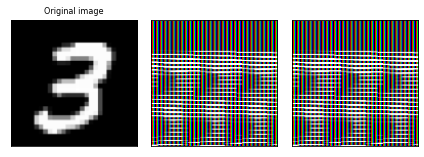

In [130]:
def add_random_boxes(img, n_k, size=1):
    h, w = size, size
    img = np.asarray(img)
    img_size = img.shape[1]
    boxes = []
    img1 = img.copy()
    for k in range(n_k):
        y, x = np.random.randint(0, img_size - w, (2,))
        img1[y : y + h, x : x + w] = 0
        boxes.append((x, y, h, w))
    img2 = Image.fromarray(img1.astype("uint8"), "RGB")
    return img2


blocks_imgs = [add_random_boxes(orig_img, n_k=i) for i in range(2)]
plot(blocks_imgs)  # , col_title=["5 black boxes","10 black boxes"])

In [123]:
orig_img.size

(124, 124)

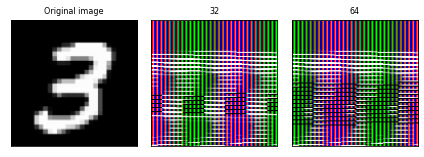

In [124]:
def add_central_region(img, size=32):
    h, w = size, size
    img = np.asarray(img)
    img_size = img.shape[1]
    img1 = img.copy()
    img1[
        int(img_size / 2 - h) : int(img_size / 2 + h),
        int(img_size / 2 - w) : int(img_size / 2 + w),
    ] = 0
    img2 = Image.fromarray(img1.astype("uint8"), "RGB")
    return img2


central_imgs = [add_central_region(orig_img, size=s) for s in (8, 16)]
plot(central_imgs, col_title=["32", "64"])